<a href="https://colab.research.google.com/github/ShoebAgha/Pytorch/blob/main/02_PyTorch_Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import make_circles

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import torch

In [5]:
X,y = make_circles(n_samples=1000,noise=0.03, random_state=42)

In [6]:
circles = pd.DataFrame({'X1':X[:,0],
                       'X2':X[:,1],
                       'label':y
})

In [7]:
X[0]

array([0.75424625, 0.23148074])

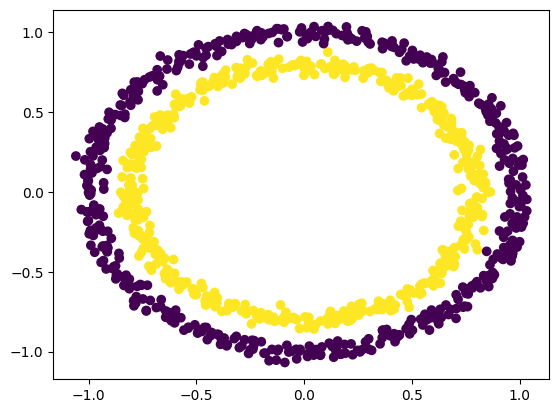

In [8]:
plt.scatter(x=circles.X1,y=circles.X2, c=y)

In [9]:
X=torch.from_numpy(X).type(torch.float).to('cuda')
y=torch.from_numpy(y).type(torch.float).to('cuda')

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [11]:
from torch import nn

In [12]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(in_features=2,out_features=5)
    self.layer2=nn.Linear(in_features=5,out_features=1)

  def forward(self, x):
    return self.layer2(self.layer1(x))

model_0=CircleModelV0()
model_0

CircleModelV0(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [13]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to('cuda')

In [14]:
y_test.shape

torch.Size([200])

In [15]:
loss_fn = nn.BCEWithLogitsLoss()

optimiser = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [16]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = correct/len(y_true)*100
  return acc

In [17]:
untrained_preds = model_0(X_test.to('cuda'))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[ 0.0076],
        [-0.0900],
        [ 0.2875],
        [-0.0718],
        [ 0.3256],
        [ 0.2657],
        [-0.0394],
        [ 0.0440],
        [ 0.2855],
        [-0.0961]], device='cuda:0', grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0')


In [18]:
y_logits = model_0(X_test)[:5]
y_logits


tensor([[ 0.0076],
        [-0.0900],
        [ 0.2875],
        [-0.0718],
        [ 0.3256]], device='cuda:0', grad_fn=<SliceBackward0>)

In [19]:
y_test[:5]

tensor([1., 0., 1., 0., 1.], device='cuda:0')

In [20]:
y_pred_prob=torch.sigmoid(y_logits)
y_pred_prob

tensor([[0.5019],
        [0.4775],
        [0.5714],
        [0.4821],
        [0.5807]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [21]:
y_pred_label = torch.round(torch.sigmoid(model_0(X_test)[:5]))
y_pred_label

tensor([[1.],
        [0.],
        [1.],
        [0.],
        [1.]], device='cuda:0', grad_fn=<RoundBackward0>)

***Building and Training Test loop***

In [22]:
torch.manual_seed(42)

epochs=100

for epoch in range(epochs):
  model_0.train()

  y_logits=model_0(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

  optimiser.zero_grad()

  loss.backward()

  optimiser.step()

  model_0.eval()

  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_pred=test_preds,y_true=y_test)

    if epoch%10==0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")





Epoch: 0 | Loss: 0.70164, Accuracy: 53.62% | Test loss: 0.69283, Test acc: 53.50%
Epoch: 10 | Loss: 0.69696, Accuracy: 50.38% | Test loss: 0.69092, Test acc: 55.50%
Epoch: 20 | Loss: 0.69551, Accuracy: 49.50% | Test loss: 0.69087, Test acc: 54.00%
Epoch: 30 | Loss: 0.69489, Accuracy: 48.75% | Test loss: 0.69113, Test acc: 52.50%
Epoch: 40 | Loss: 0.69453, Accuracy: 48.50% | Test loss: 0.69138, Test acc: 53.00%
Epoch: 50 | Loss: 0.69426, Accuracy: 48.12% | Test loss: 0.69160, Test acc: 51.00%
Epoch: 60 | Loss: 0.69405, Accuracy: 48.12% | Test loss: 0.69180, Test acc: 51.50%
Epoch: 70 | Loss: 0.69387, Accuracy: 47.75% | Test loss: 0.69199, Test acc: 51.50%
Epoch: 80 | Loss: 0.69373, Accuracy: 48.00% | Test loss: 0.69216, Test acc: 50.50%
Epoch: 90 | Loss: 0.69361, Accuracy: 48.00% | Test loss: 0.69233, Test acc: 49.00%


In [23]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

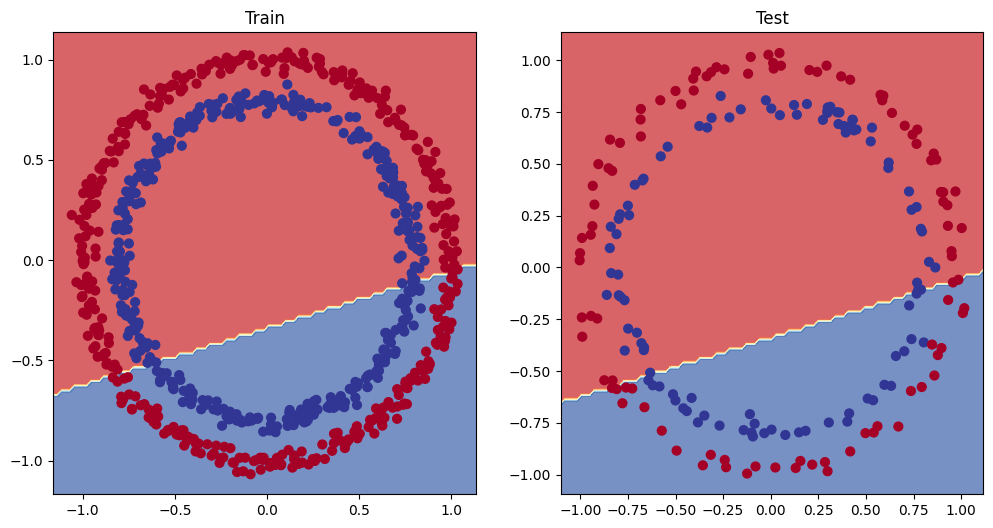

In [24]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_0,X_test,y_test)

In [25]:
from torch import nn
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(in_features=2,out_features=10)
    self.layer2=nn.Linear(in_features=10,out_features=10)
    self.layer3=nn.Linear(in_features=10,out_features=1)
    self.relu=nn.ReLU()

  def forward(self, x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))
model_1 = CircleModelV1().to('cuda')
print(model_1)

CircleModelV1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [26]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimiser = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [27]:
# Fit the model
torch.manual_seed(42)
epochs = 1000

# Put all data on target device
X_train, y_train = X_train.to('cuda'), y_train.to('cuda')
X_test, y_test = X_test.to('cuda'), y_test.to('cuda')

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimiser.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimiser.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_1(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calculate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69319, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test Loss: 0.69102, Test Accuracy: 52.50%
Epoch: 200 | Loss: 0.68977, Accuracy: 53.37% | Test Loss: 0.68940, Test Accuracy: 55.00%
Epoch: 300 | Loss: 0.68795, Accuracy: 53.00% | Test Loss: 0.68723, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.68517, Accuracy: 52.75% | Test Loss: 0.68411, Test Accuracy: 56.50%
Epoch: 500 | Loss: 0.68102, Accuracy: 52.75% | Test Loss: 0.67941, Test Accuracy: 56.50%
Epoch: 600 | Loss: 0.67515, Accuracy: 54.50% | Test Loss: 0.67285, Test Accuracy: 56.00%
Epoch: 700 | Loss: 0.66659, Accuracy: 58.38% | Test Loss: 0.66322, Test Accuracy: 59.00%
Epoch: 800 | Loss: 0.65160, Accuracy: 64.00% | Test Loss: 0.64757, Test Accuracy: 67.50%
Epoch: 900 | Loss: 0.62362, Accuracy: 74.00% | Test Loss: 0.62145, Test Accuracy: 79.00%


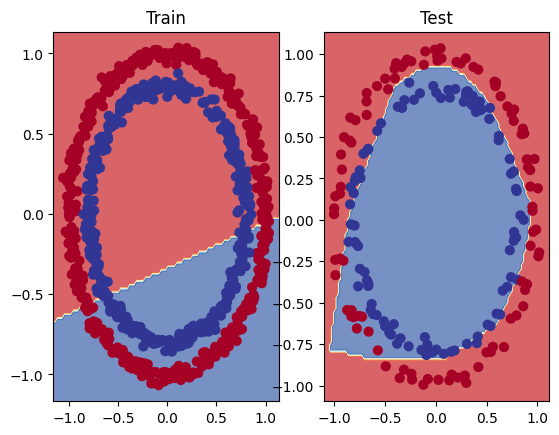

In [28]:
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_1,X_test,y_test)

***Multi Class Classification***

In [30]:
from sklearn.datasets import make_blobs

In [50]:
X_blobs, y_blobs = make_blobs(
    n_samples=1000,
    n_features=2,
    centers=4,
    cluster_std=1.5,
    random_state=42
)
X_blobs=torch.from_numpy(X_blobs).type(torch.float).to('cuda')
y_blobs=torch.from_numpy(y_blobs).type(torch.LongTensor).to('cuda')

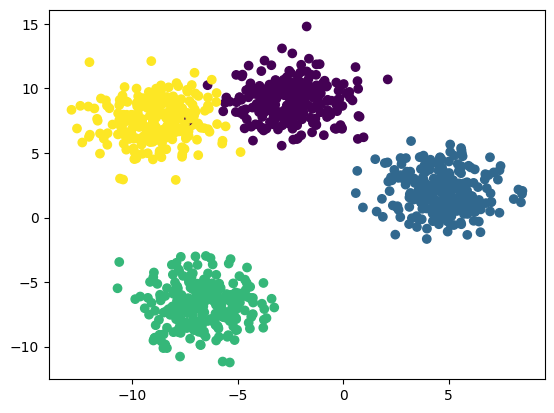

In [52]:
plt.scatter(X_blobs[:,0].to('cpu'),X_blobs[:,1].to('cpu'),c=y_blobs.to('cpu'))

In [53]:
X_blobs.device

device(type='cuda', index=0)

In [56]:
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blobs,
    y_blobs,
    test_size=0.2,
    random_state=42
)